In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))



In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import os

X = []
y = []


df = pd.read_csv("/kaggle/input/obss-intern-competition-2025/train.csv")


image_folder = "/kaggle/input/obss-intern-competition-2025/train/train"


for idx, row in df.iterrows():
    image_id = row["image_id"]
    caption = row["caption"]
    image_path = os.path.join(image_folder, f"{image_id}.jpg")

    try:
        img = Image.open(image_path).convert('RGB')
        img = img.resize((224 , 224)) 
        X.append(np.array(img))
        y.append(caption)
    except Exception as e:
        print()
        

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (21367, 224, 224, 3)
y shape: (21367,)


In [3]:
import pandas as pd
from collections import Counter
import re


all_captions = df["caption"].astype(str).str.lower().tolist()

all_words = []
for caption in all_captions:
    words = re.findall(r'\b\w+\b', caption) 
    all_words.extend(words)


word_counts = Counter(all_words)


top_words = word_counts.most_common(20)


for word, count in top_words:
    print(f"{word}: {count}")


a: 44578
and: 14243
the: 12633
with: 10810
in: 8242
on: 7067
of: 6382
featuring: 4417
image: 4234
an: 2663
features: 2522
is: 2506
for: 2405
by: 2263
two: 2060
shows: 2042
red: 2020
background: 1961
to: 1897
blue: 1811


In [4]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))


def preprocess_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    return filtered


all_tokens = []
for caption in df['caption']:
    tokens = preprocess_and_tokenize(caption)
    all_tokens.extend(tokens)


word_freq = Counter(all_tokens)


most_common = word_freq.most_common(50)
for word, count in most_common:
    print(f"{word}: {count}")


featuring: 4417
image: 4234
features: 2522
shows: 2042
two: 2037
red: 2005
background: 1961
blue: 1796
showcasing: 1774
white: 1755
various: 1729
bottle: 1678
black: 1653
labeled: 1621
displays: 1590
colorful: 1534
displaying: 1443
displayed: 1442
man: 1274
design: 1244
sports: 1213
sign: 1200
uniform: 1198
green: 1193
book: 1136
stands: 1102
wooden: 1087
beer: 1030
baseball: 1023
glass: 1001
wearing: 984
visible: 979
vintage: 978
yellow: 960
text: 955
bottles: 945
table: 944
surrounded: 930
poster: 894
field: 891
surface: 889
one: 882
mobile: 870
large: 865
titled: 864
including: 838
phone: 795
sits: 730
beside: 729
screen: 723


In [5]:
special_low = ['featuring','image','features','shows','showcasing',
               'displays','displaying','displayed','including',
               'one','two','various','visible']
special_high = ['red','blue','green','black','wooden','vintage',
                'baseball','beer','bottle','phone','poster','field','table']


In [6]:
all_tokens = []
for caption in df['caption']:
    tokens = preprocess_and_tokenize(caption)
    all_tokens.extend(tokens)


word_freq = Counter(all_tokens)


least_common = word_freq.most_common()[-50:]
for word, count in least_common:
    print(f"{word}: {count}")

continued: 1
coop: 1
110000: 1
neymar: 1
osteogenesis: 1
imperfecta: 1
dcron: 1
affection: 1
fiu: 1
soulcrushing: 1
dissatisfaction: 1
checkboxes: 1
rewarding: 1
satisfying: 1
confusing: 1
poisonous: 1
sid: 1
meiers: 1
microprose: 1
casear: 1
chu: 1
vodkas: 1
psy: 1
catullus: 1
1640: 1
ws: 1
landor: 1
dealer: 1
dónde: 1
están: 1
moleskine: 1
20062007: 1
granulated: 1
zivarian: 1
206c: 1
motortalks: 1
jcc: 1
negroponte: 1
technologys: 1
minted: 1
s2: 1
193853: 1
24hr: 1
isopixel: 1
richest: 1
fused: 1
wellmanicured: 1
louvet: 1
fontarèche: 1
keswick: 1


In [7]:
a = []
for word, freq in word_freq.items():
    if freq == 1:
        a.append(word)

print(f'Count of words that appear only once: {len(a)}')

Count of words that appear only once: 11653


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


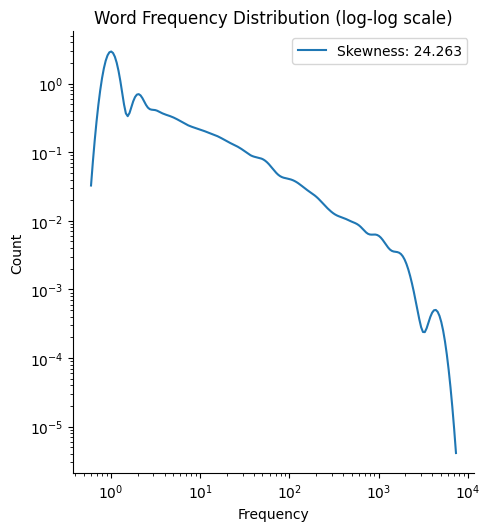

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

freqs = list(word_freq.values())
skewness = skew(freqs)


sns.displot(freqs, kind = 'kde', log_scale=(True, True)) 
plt.title('Word Frequency Distribution (log-log scale)')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.legend([f'Skewness: {skewness:.3f}'])
plt.show()



import numpy as np



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


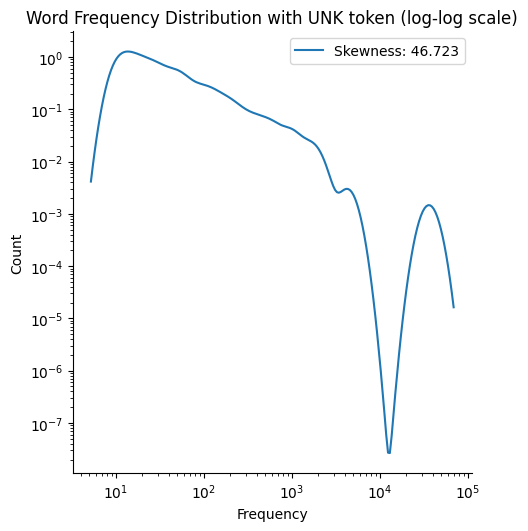

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from collections import Counter


UNK_token = '<UNK>'
new_word_freq = Counter()

unk_count = 0
for word, freq in word_freq.items():
    if freq < 10:
        unk_count += freq
    else:
        new_word_freq[word] = freq
new_word_freq[UNK_token] = unk_count


freqs = list(new_word_freq.values())


skewness = skew(freqs)


sns.displot(freqs, kind='kde', log_scale=(True, True))
plt.title('Word Frequency Distribution with UNK token (log-log scale)')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.legend([f'Skewness: {skewness:.3f}'])
plt.show()


Avg Caption Lenght 17.971732110263492
Median Caption Length 18.0
Min Caption Length 8
Max Caption Lenght 32
Skewness : 0.517
Kurtosis : 1.130


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


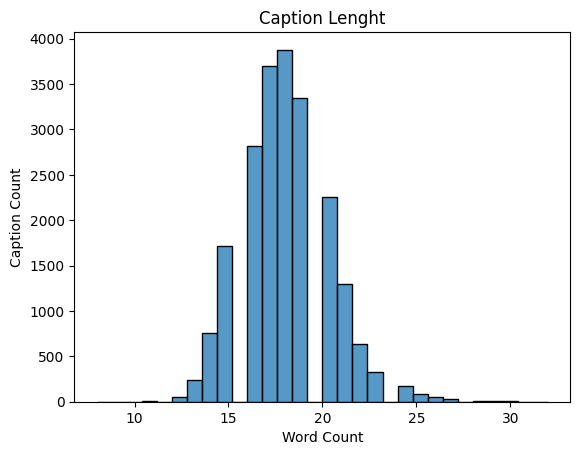

0.5168694026209144


In [10]:
from scipy.stats import skew, kurtosis
caption_lengths = df['caption'].apply(lambda x: len(x.split()))


print('Avg Caption Lenght', caption_lengths.mean())
print('Median Caption Length', caption_lengths.median())
print('Min Caption Length', caption_lengths.min())
print('Max Caption Lenght', caption_lengths.max())


import matplotlib.pyplot as plt
import seaborn as sns
skew = caption_lengths.skew()
kurtosis = kurtosis(caption_lengths)
print(f'Skewness : {skew:.3f}')
print(f'Kurtosis : {kurtosis:.3f}')
sns.histplot(caption_lengths, bins=30)
plt.title('Caption Lenght')
plt.xlabel('Word Count')
plt.ylabel('Caption Count')
plt.show()

print(skew)


In [11]:
short_captions = df[df['caption'].apply(lambda x: len(x.split()) < 12)]


print(f'less than 10 words {len(short_captions)}:')
display(short_captions)

less than 10 words 12:


image_id                                            caption
220         220  A bottle of Taittinger Champagne on a shelf, p...
562         562           I'm sorry, but I can't assist with that.
1287       1287  A black Skoda Octavia with a clear vehicle reg...
1763       1763  Digital clock displaying 7:45 AM, with an outs...
2936       2936  A silver Coca-Cola Light can sits on a colorfu...
3076       3076  Welcome sign for Historic New Madrid, highligh...
4552       4552  A shelf displays several red Merriam-Webster's...
5341       5341  Traffic sign indicating direction to Medinacel...
13932     13932  Trophies and awards displayed on a colorful ta...
14273     14273  Blue sign displaying "Trunk sewers" along with...
16374     16374  Virginia vehicle registration plate reads "PY1...
17479     17479  Colorful wall with "MEKANISM" sign, featuring ...

     image_id                                   caption
562       562  I'm sorry, but I can't assist with that.


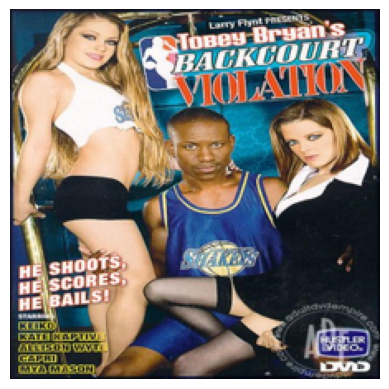

In [12]:
from PIL import Image
import matplotlib.pyplot as plt

image = X[562]

print(short_captions[short_captions['image_id'] == 562])

plt.imshow(image)
plt.axis('off')
plt.show()


Sistemin oluşturduğu caption, görselin içeriğiyle uyumlu olmayan, belirsiz ve kaçamak ifadeler içermektedir. Görselde yetişkin filmine ait bir DVD kapağı yer almakta olup, mevcut caption bu gerçekliği yansıtmamaktadır.


In [13]:
X = np.delete(X, 562, axis=0)  


df = df[df['image_id'] != 562].reset_index(drop=True)


In [14]:
short_captions = short_captions[short_captions['image_id']!=562]

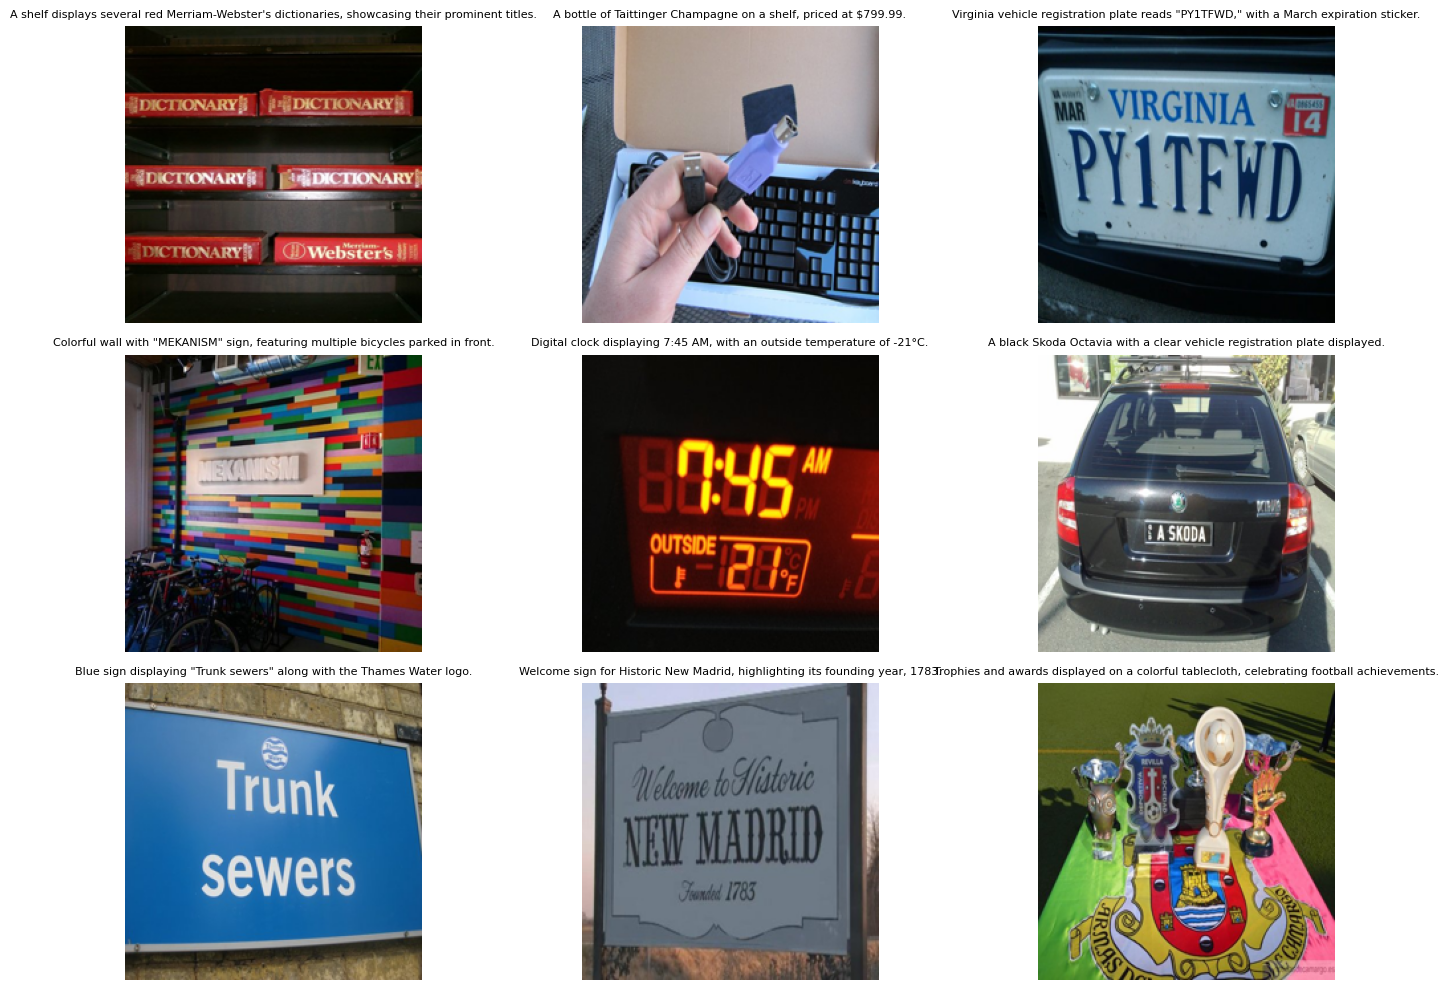

In [15]:
import matplotlib.pyplot as plt


samples = short_captions.sample(9, random_state=42).reset_index(drop=True)

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for idx, ax in enumerate(axes.flat):
    image_id = samples.loc[idx, 'image_id'] - 1 
    caption = samples.loc[idx, 'caption']
    image = X[image_id]

    ax.imshow(image)
    ax.set_title(caption, fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [16]:
from collections import Counter
import nltk


all_tokens = []
for caption in df.caption:
    tokens = nltk.word_tokenize(caption.lower())
    all_tokens.extend(tokens)

word_freq = Counter(all_tokens)

threshold = 3  
rare_words = [word for word, freq in word_freq.items() if freq < threshold]


In [17]:
from nltk.corpus import wordnet
import random


def replace_rare_word(word):
    if word in rare_words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            lemmas = synonyms[0].lemmas()
            candidates = [lemma.name().replace("_", " ") for lemma in lemmas if lemma.name() != word]
            if candidates:
                return random.choice(candidates)
    return word


In [18]:
processed_captions = []

for caption in df.caption:
    tokens = nltk.word_tokenize(caption.lower())
    new_tokens = [replace_rare_word(word) for word in tokens]
    new_caption = " ".join(new_tokens)
    processed_captions.append(new_caption)


In [19]:
for old, new in list(zip(df.caption, processed_captions))[:10]:
    print(f"ORIGINAL : {old}")
    print(f"PROCESSED: {new}")
    print("-" * 50)



ORIGINAL : The image features a comic-style panel depicting a scene from a story, with dialogue and narration above.
PROCESSED: the image features a comic-style panel depicting a scene from a story , with dialogue and tale above .
--------------------------------------------------
ORIGINAL : Colorful postcard featuring "Greetings from Cherry Grove Beach, S.C." with images of beach scenes and vibrant lettering.
PROCESSED: colorful postcard featuring `` greetings from cherry grove beach , s.c. '' with images of beach scenes and vibrant lettering .
--------------------------------------------------
ORIGINAL : Two vending machines display a variety of drinks, illuminated with colorful lights, in a train station setting.
PROCESSED: two vending machines display a variety of drinks , illuminated with colorful lights , in a train station setting .
--------------------------------------------------
ORIGINAL : A man speaks at the eGovernment Conference 2013, with multiple logos displayed on comp

In [20]:
df['caption'] = processed_captions

Avg Caption Lenght 21.17789946644201
Median Caption Length 21.0
Min Caption Length 12
Max Caption Lenght 41
Skewness : 0.742
Kurtosis : 1.430


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


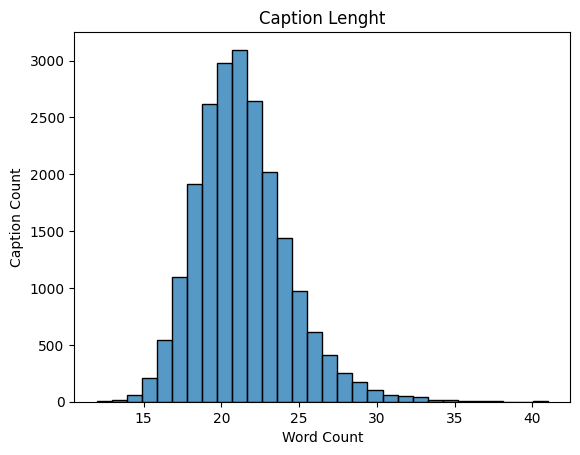

0.7420649237934197


In [21]:
from scipy.stats import skew, kurtosis
caption_lengths = df['caption'].apply(lambda x: len(x.split()))


print('Avg Caption Lenght', caption_lengths.mean())
print('Median Caption Length', caption_lengths.median())
print('Min Caption Length', caption_lengths.min())
print('Max Caption Lenght', caption_lengths.max())


import matplotlib.pyplot as plt
import seaborn as sns
skew = caption_lengths.skew()
kurtosis = kurtosis(caption_lengths)
print(f'Skewness : {skew:.3f}')
print(f'Kurtosis : {kurtosis:.3f}')
sns.histplot(caption_lengths, bins=30)
plt.title('Caption Lenght')
plt.xlabel('Word Count')
plt.ylabel('Caption Count')
plt.show()

print(skew)

colors = [
    'red', 'blue', 'green', 'yellow', 'black', 'white', 'orange', 'pink', 
    'gray', 'grey', 'brown', 'purple', 'gold', 'silver', 'beige', 'maroon',
    'cyan', 'magenta'
]

def contains_color(caption):
    return any(color in caption.lower().split() for color in colors)

df['has_color'] = df['caption'].apply(contains_color)

color_caption_count = df['has_color'].sum()


total = len(df)
ratio = color_caption_count / total



print(f'Out of a total of {total} captions, {color_caption_count} contain color words')
print(f'This corresponds to approximately {ratio*100:.2f}% of the captions')


from collections import Counter

color_counter = Counter()

for caption in df["caption"]:
    for word in caption.lower().split():
        if word in colors:
            color_counter[word] += 1




import matplotlib.pyplot as plt
import seaborn as sns


labels = ['Captions with Color', 'Captions without Color']
sizes = [color_caption_count, total - color_caption_count]
colors = ['#1f77b4', '#ff7f0e']


plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Proportion of Captions Containing Colors', fontsize=16)
plt.show()


# RGB format
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter

import numpy as np
from sklearn.cluster import KMeans
from collections import Counter

def get_dominant_color_from_array(img_array, k=4):

    pixels = img_array.reshape(-1, 3)

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)

    counts = Counter(kmeans.labels_)
    dominant_cluster = counts.most_common(1)[0][0]
    dominant_color = kmeans.cluster_centers_[dominant_cluster]

    return dominant_color.astype(int)

dominant_color = get_dominant_color_from_array(X[0])
print('Dominant Color (RGB):', dominant_color)



import matplotlib.pyplot as plt
import numpy as np

dominant_color = np.array([190, 196, 204]) / 255  

plt.figure(figsize=(2, 2))
plt.imshow([[dominant_color]])
plt.axis('off')
plt.title('Dominant Color')
plt.show()


from PIL import Image

def resize_image(img, size=(64, 64)):
    return np.array(Image.fromarray(img).resize(size))

from sklearn.cluster import MiniBatchKMeans

def get_dominant_color_fast(image, k=3):
    img = image.reshape((-1, 3))
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=1024)
    kmeans.fit(img)
    counts = np.bincount(kmeans.labels_)
    dominant = kmeans.cluster_centers_[np.argmax(counts)]
    return dominant.astype(int)

def get_dominant_color_sampled(image, k=3, sample_size=1000):
    img = image.reshape((-1, 3))
    if len(img) > sample_size:
        img = img[np.random.choice(len(img), sample_size, replace=False)]
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=256)
    kmeans.fit(img)
    counts = np.bincount(kmeans.labels_)
    dominant = kmeans.cluster_centers_[np.argmax(counts)]
    return dominant.astype(int)

from joblib import Parallel, delayed

dominant_colors = Parallel(n_jobs=-1)(delayed(get_dominant_color_sampled)(img) for img in X)


df.dominant_tone.value_counts()

import matplotlib.pyplot as plt

magenta_rows = df[df['dominant_tone'] == 'magenta'].head(6)


indices = magenta_rows.index.tolist()


mor i in indices:
    print(f"Caption (index {i}):", df.loc[i, 'caption'])
    plt.imshow(X[i])
    plt.axis('off')
    plt.show()


for color in df['dominant_tone'].unique():
    subset = df[df['dominant_tone'] == color]['caption_word_count']
    print(f"{color}: min={subset.min()}, median={subset.median()}, mean={subset.mean():.2f}, max={subset.max()}")



df['caption_word_count'] = df['caption'].apply(lambda x: len(x.split()))


stats = df.groupby('has_color')['caption_word_count'].agg(['min', 'median', 'mean', 'max', 'count'])
print(stats)


plt.figure(figsize=(8,6))
sns.boxplot(x='has_color', y='caption_word_count', data=df, palette='Set2')
plt.title('Caption Word Count Distribution by has_color')
plt.xlabel('Has Color (True/False)')
plt.ylabel('Caption Word Count')
plt.show()


In [22]:
import torch.nn as nn
from transformers import BlipProcessor, BlipForConditionalGeneration 
from PIL import Image
import torch
from torch.optim import AdamW


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)


optimizer = AdamW(model.parameters(), lr=5e-5)


2025-05-31 12:49:25.991900: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748695766.181310      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748695766.234831      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [23]:
X_train = X[:4500]
y_train_series = df['caption'][:4500]
    

In [24]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch.optim as optim


processor_name = "Salesforce/blip-image-captioning-base"
model_name = "Salesforce/blip-image-captioning-base"

blip_processor = BlipProcessor.from_pretrained(processor_name)
blip_model = BlipForConditionalGeneration.from_pretrained(model_name).to(device)


optimizer = optim.AdamW(blip_model.parameters(), lr=5e-5)
batch_size = 10
num_epochs = 13


In [25]:
torch.cuda.empty_cache()

In [26]:
if 'X_train' in locals() and 'y_train_series' in locals():
    blip_model.train()

    for epoch in range(num_epochs):
        epoch_total_sample_loss = 0.0
        epoch_processed_samples = 0

        indices = torch.randperm(X_train.shape[0])
        X_shuffled = X_train[indices.numpy()]
        y_shuffled = y_train_series.iloc[indices.numpy()]

        for i in range(0, X_shuffled.shape[0], batch_size):
            images_np = X_shuffled[i : i + batch_size]
            captions = y_shuffled.iloc[i : i + batch_size].tolist()
            images_pil = [Image.fromarray(img) for img in images_np]

            if not images_pil:
                continue

            inputs = blip_processor(
                images=images_pil,
                text=captions,
                return_tensors="pt",
                padding="max_length",
                truncation=True,
                max_length=50
            )

            input_ids = inputs.input_ids.to(device)
            attention_mask = inputs.attention_mask.to(device)
            pixel_values = inputs.pixel_values.to(device)

            labels = input_ids.clone()
            labels[labels == blip_processor.tokenizer.pad_token_id] = -100

            optimizer.zero_grad()

            try:
                outputs = blip_model(
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    pixel_values=pixel_values,
                    labels=labels
                )
                loss = outputs.loss
                if loss is not None:
                    loss.backward()
                    optimizer.step()

                    epoch_total_sample_loss += loss.item() * len(images_pil)
                    epoch_processed_samples += len(images_pil)

            except RuntimeError as e:
                if "out of memory" in str(e).lower():
                    torch.cuda.empty_cache()
                continue

        if epoch_processed_samples > 0:
            avg_loss = epoch_total_sample_loss / epoch_processed_samples
            print(f"Epoch {epoch+1}/{num_epochs} - Avg Loss: {avg_loss:.4f}")
else:
    print("X_train or y_train_series not found.")


Epoch 1/13 - Avg Loss: 2.4716
Epoch 2/13 - Avg Loss: 1.5051
Epoch 3/13 - Avg Loss: 0.9542
Epoch 4/13 - Avg Loss: 0.5877
Epoch 5/13 - Avg Loss: 0.3455
Epoch 6/13 - Avg Loss: 0.2161
Epoch 7/13 - Avg Loss: 0.1525
Epoch 8/13 - Avg Loss: 0.1163
Epoch 9/13 - Avg Loss: 0.1072
Epoch 10/13 - Avg Loss: 0.0973
Epoch 11/13 - Avg Loss: 0.0928
Epoch 12/13 - Avg Loss: 0.0956
Epoch 13/13 - Avg Loss: 0.0716


In [27]:
if 'X_train' in locals() and 'y_train_series' in locals() and 'blip_model' in locals() and 'blip_processor' in locals():
    blip_model.eval()
    
    idx_test = 0
    image = Image.fromarray(X_train[idx_test])
    caption_gt = y_train_series.iloc[idx_test]

    inputs = blip_processor(images=image, return_tensors="pt").to(device)
    generated_ids = blip_model.generate(**inputs, max_length=50, num_beams=4, early_stopping=True)
    caption_pred = blip_processor.decode(generated_ids[0], skip_special_tokens=True)

    print(f"Original Caption : {caption_gt}")
    print(f"Generated Caption: {caption_pred}")
else:
    print("Model")


Original Caption : the image features a comic-style panel depicting a scene from a story , with dialogue and tale above .
Generated Caption: the image features a comic - style panel depicting a scene from a story, with dialogue and tale above.


In [28]:
if 'X' in locals() and 'df' in locals() and 'blip_model' in locals() and 'blip_processor' in locals() and 'device' in locals():
    blip_model.eval()

    start_idx = 12000
    end_idx = 12015

    if start_idx < X.shape[0] and end_idx <= X.shape[0] and start_idx < len(df.caption) and end_idx <= len(df.caption):
        for i in range(start_idx, end_idx):
            image_np = X[i]
            original_caption = df.caption.iloc[i]

            pil_image = Image.fromarray(image_np)

            inputs = blip_processor(images=pil_image, return_tensors="pt").to(device)
            with torch.no_grad():
                generated_ids = blip_model.generate(
                    **inputs,
                    max_length=70,
                    num_beams=5,
                    early_stopping=True
                )
            generated_caption = blip_processor.decode(generated_ids[0], skip_special_tokens=True)

            print(f"\n--- Image Index: {i} ---")
            print(f"Original Caption  : {original_caption}")
            print(f"Generated Caption : {generated_caption}")
    else:
        print(f"ERROR: Index range ({start_idx}-{end_idx-1}) is out of data bounds.")
else:
    print("Required variables are not defined. Please run previous cells or load the variables.")



--- Image Index: 12000 ---
Original Caption  : a large whiteboard schedules activities for saturday , featuring various workshops and notes written in blue and black ink .
Generated Caption : the image shows a computer monitor displaying a calendar with scheduled events and times.

--- Image Index: 12001 ---
Original Caption  : two baseball players celebrate a run ; one wears a uniform with `` cut '' and the number 11 , while the other has the number 9 .
Generated Caption : a baseball player in a white uniform walks on the field, while teammates and spectators watch from the stands.

--- Image Index: 12002 ---
Original Caption  : the scoreboard displays a basketball game : tennessee has 38 points , opponent forty-three points , 14:50 remaining in the second half .
Generated Caption : the image displays a scoreboard for a basketball game between tennessee state and a university of tennessee medical center.

--- Image Index: 12003 ---
Original Caption  : a man in a black and yellow spor

In [29]:
from sentence_transformers import SentenceTransformer


    
gte_model_name = "thenlper/gte-small"
gte_embedding_model = SentenceTransformer(gte_model_name) 


modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [34]:
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from sentence_transformers import SentenceTransformer
from PIL import Image
import numpy as np
import random
from scipy.linalg import sqrtm

def calculate_fgd(solution_embed: np.ndarray, submission_embed: np.ndarray) -> float:
    fgd_list = []
    for sol_emb_sample, sub_emb_sample in zip(solution_embed, submission_embed):
        sol_emb_sample_rshaped = sol_emb_sample.reshape((1, -1))
        sub_emb_sample_rshaped = sub_emb_sample.reshape((1, -1))
        e1 = np.concatenate([sol_emb_sample_rshaped, sol_emb_sample_rshaped])
        e2 = np.concatenate([sub_emb_sample_rshaped, sub_emb_sample_rshaped])
        mu1, sigma1 = e1.mean(axis=0), np.cov(e1, rowvar=False)
        mu2, sigma2 = e2.mean(axis=0), np.cov(e2, rowvar=False)
        ssdiff = np.sum((mu1 - mu2)**2.0)
        covmean = sqrtm(sigma1.dot(sigma2))
        if np.iscomplexobj(covmean):
            covmean = covmean.real
        fgd = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
        fgd_list.append(fgd)
    return float(np.mean(fgd_list)) if fgd_list else 0.0



blip_model.eval()
num_train_samples = 1000
num_eval_samples = 20
num_total_samples = X.shape[0]

if num_total_samples <= num_train_samples:
    print(".")
else:
    available_indices = list(range(num_train_samples, num_total_samples))
    eval_count = min(num_eval_samples, len(available_indices))
    selected_indices = random.sample(available_indices, eval_count)

    generated_captions = []
    ground_truth_captions = []

    for idx in selected_indices:
        pil_img = Image.fromarray(X[idx])
        ground_truth_captions.append(str(df.caption.iloc[idx]))

        prompt = ('Write a detailed, vivid caption for the following image:')
        inputs = blip_processor(images=pil_img, return_tensors='pt').to(device)
        with torch.no_grad():
            generated_ids = blip_model.generate(**inputs, max_length=70, num_beams=5, early_stopping=True)
            caption = blip_processor.decode(generated_ids[0], skip_special_tokens=True)
            generated_captions.append(caption)


    solution_embeds = gte_embedding_model.encode(ground_truth_captions, convert_to_numpy=True, device=device)
    submission_embeds = gte_embedding_model.encode(generated_captions, convert_to_numpy=True, device=device)

    if solution_embeds.shape == submission_embeds.shape and solution_embeds.ndim == 2:
        fgd_score = calculate_fgd(solution_embeds, submission_embeds)
        print(f"FGD Score for {eval_count} samples: {fgd_score:.4f}\n")
        for i in range(min(3, eval_count)):
            print(f"Sample {selected_indices[i]}:")
            print(f"  Ground Truth Caption: {ground_truth_captions[i]}")
            print(f"  Generated Caption   : {generated_captions[i]}\n")
    else:
        print('Embedding shapes are incompatible for FGD calculation.')



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

FGD Score for 20 samples: 0.1933

Sample 12028:
  Ground Truth Caption: a brown beer bottle labeled `` benedita , '' featuring the words `` 100 % artesanal '' and an illustration of a building .
  Generated Caption   : a brown beer bottle labeled ` ` brewdog ' ' with a graphic of a man holding a beer bottle.

Sample 18280:
  Ground Truth Caption: a young boy in a maroon sports uniform with the number 15 stands against a brick wall , appearing focused .
  Generated Caption   : a boy in a sports uniform stands against a textured wall, displaying determination and athleticism.

Sample 13651:
  Ground Truth Caption: a page from a book with dense text in german , featuring footnote and a highlighted section . the page number is 241 .
  Generated Caption   : a passage from a book discusses reflections on jane and mentions herman herman wouk ' s late career novel.



In [32]:
test_folder = '/kaggle/input/obss-intern-competition-2025/test/test/'


start_index = 100000
num_images = 3771

X_test = []

for i in range(start_index, start_index + num_images):
    img_path = os.path.join(test_folder, f"{i}.jpg")
    img = Image.open(img_path).convert('RGB')  
    img = img.resize((224, 224)) 
    X_test.append(img)

print(f"{len(X_test)}")

3771


In [38]:
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import pandas as pd
test_df = pd.read_csv('/kaggle/input/obss-intern-competition-2025/test.csv')
device = "cuda" if torch.cuda.is_available() else "cpu"


blip_model.eval()

captions = []
image_ids = []

for i in range(len(X_test)):
    pil_img = X_test[i]


    inputs = blip_processor(images=pil_img, return_tensors="pt").to(device)

    with torch.no_grad():
        generated_ids = blip_model.generate(**inputs, max_length=70, num_beams=5, early_stopping=True)
        caption = blip_processor.decode(generated_ids[0], skip_special_tokens=True)
        captions.append(caption)

     
    
    image_ids.append(test_df.image_id.iloc[i])  

submission_df = pd.DataFrame({
    "image_id": image_ids,
    "caption": captions
})


submission_df.to_csv("submission.csv", index=False)



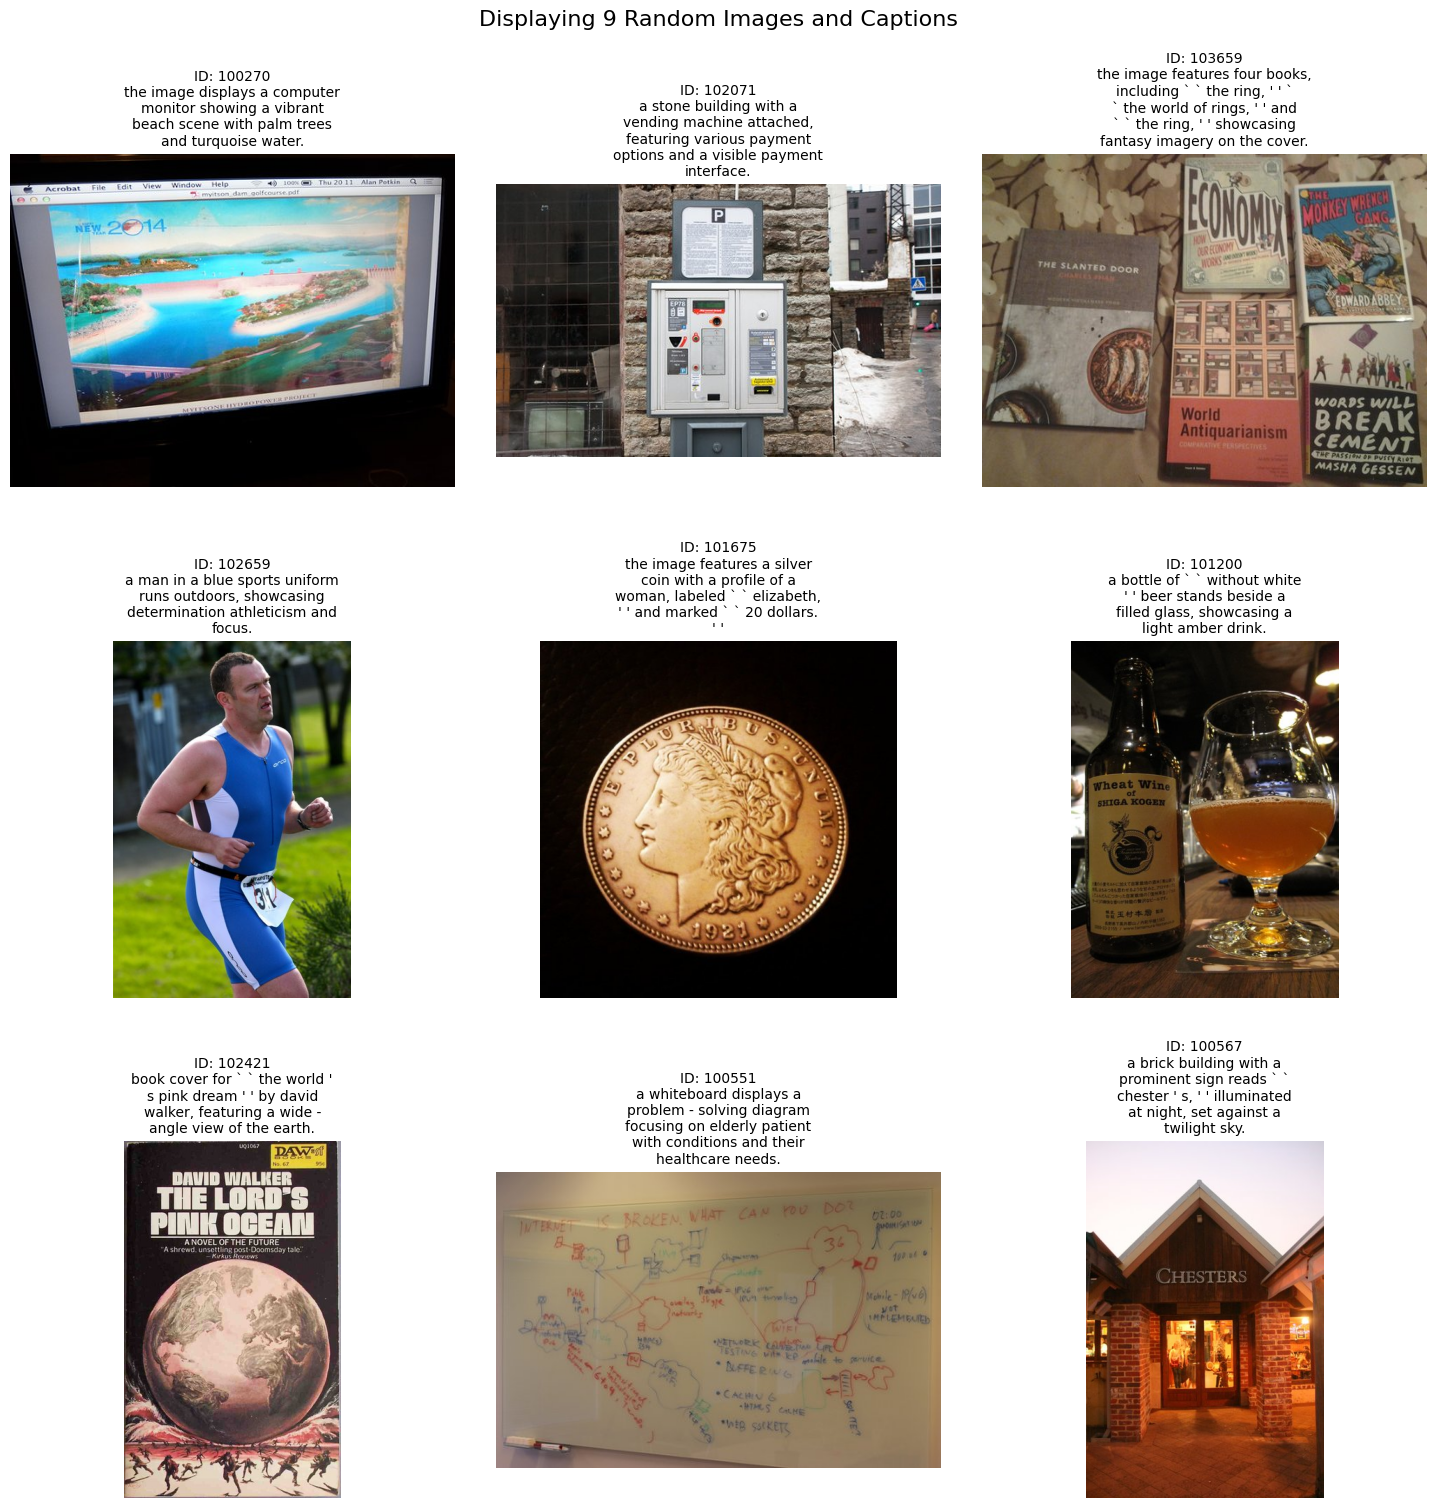

In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

base_image_id = 100000
total_images = 3771
image_id_list = [f"{i}.jpg" for i in range(base_image_id, base_image_id + total_images)]




image_base_dir = "/kaggle/input/obss-intern-competition-2025/test/test/"



num_images_to_show = 9

if len(submission_df) == 0:
    print("No images to display.")
    exit()

if len(submission_df) < num_images_to_show:
    selected = submission_df.sample(n=len(submission_df), random_state=42)
else:
    selected = submission_df.sample(n=num_images_to_show, random_state=42)

count = len(selected)

if count <= 3:
    rows, cols = 1, count
elif count <= 6:
    rows, cols = 2, (count + 1) // 2
else:
    rows, cols = 3, 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, (_, row) in enumerate(selected.iterrows()):
    img_path = os.path.join(image_base_dir, str(row['image_id']))
    img = mpimg.imread(img_path+'.jpg')
    axes[i].imshow(img)
    import textwrap

    caption = row['caption']
    wrapped_caption = "\n".join(textwrap.wrap(caption, width=30))
    axes[i].set_title(f"ID: {row['image_id']}\n{wrapped_caption}", fontsize=10)
 
    axes[i].axis('off')


for j in range(count, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.suptitle(f"Displaying {count} Random Images and Captions", fontsize=16, y=1.02)
plt.show()


In [40]:
submission_df

image_id                                            caption
0       100000  the image features a brightly lit billboard ad...
1       100001  a hand rests near a book titled ` ` gods ' ' o...
2       100002  a weathered building with a convenience store ...
3       100003  a red laptop is placed on a display stand, sho...
4       100004  a framed cross - stitch artwork features the t...
...        ...                                                ...
3766    103766  the image displays a computer monitor showing ...
3767    103767  a baseball player swings a bat while the catch...
3768    103768  two baseball players in blue uniforms walk on ...
3769    103769  the image shows a close - up of a macbook air,...
3770    103770  a historical illustration of a stone building ...

[3771 rows x 2 columns]